Importing the necessary Libraries

In [ ]:
#!pip install --upgrade scikit-learn==1.4.0 -q

In [ ]:
!pip install --upgrade scikit-learn -q

In [ ]:
import sklearn
sklearn.set_config(transform_output="pandas")

In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (8, 6) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))
import warnings
warnings.filterwarnings('ignore')

In [ ]:
car_adverts = pd.read_csv('/content/adverts (4).csv')

In [ ]:
car_adverts.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
car_adverts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


**Feature Engineering**

In [ ]:
#creating a list of numerical features
numerical_features = ['mileage', 'year_of_registration', 'price']

#creating a dataframe for the numerical features
numerical_df = car_adverts[numerical_features]

In [ ]:
numerical_df.describe(include = 'all')

,mileage,year_of_registration,price
count,401878.000000,368694.000000,4.020050e+05
mean,37743.595656,2015.006206,1.734197e+04
std,34831.724018,7.962667,4.643746e+04
min,0.000000,999.000000,1.200000e+02
25%,10481.000000,2013.000000,7.495000e+03
50%,28629.500000,2016.000000,1.260000e+04
75%,56875.750000,2018.000000,2.000000e+04
max,999999.000000,2020.000000,9.999999e+06


In [ ]:
# Select numerical features
numerical_features = car_adverts.select_dtypes(include=['float64', 'int64'])

# Plot histograms for numerical features
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=car_adverts, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

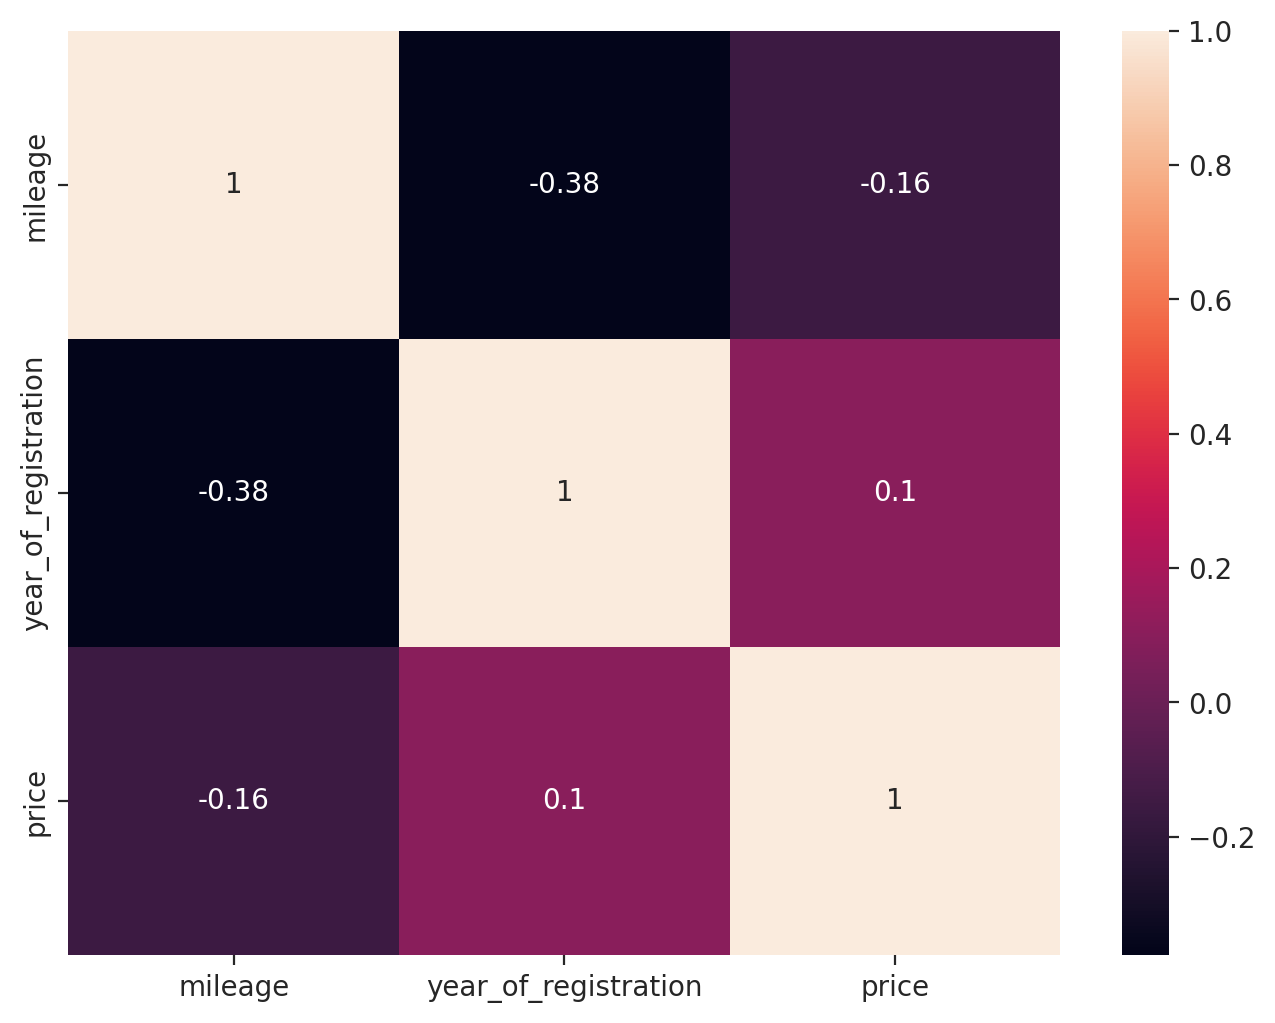

In [ ]:
sns.heatmap(numerical_df.corr(), annot = True)
plt.show()

correlation coefficient of -0.16 between mileage and price is an indicator of the relationship
between these two variables, it's a weak negative correlation, meaning that as the mileage of a
car increases, the price of the car decreases, but the correlation is very weak, mileage of a car
does not have a large effect on the price of a car.

the correlation coefficient of 0.1 between year of registration and price is an indicator
of the relationship between these two variables, it is a weak positive correlation,
meaning that as the year of registration of a car increases, the price of the car increases too, but the correlation is weak, year of registration of a car does not have a large effect on the price of a car.

the correlation coefficient of -0.38 between year of registration and mileage is an indicator
of the relationship between these two variables, it is a moderate negative correlation,
meaning that as the year of registration of a car increases, the mileage of the car decreases,
meaning that newer cars are driven less than older cars.

In [ ]:
#creating a list of categorical features
categorical_features = ['reg_code', 'standard_colour', 'standard_make',
                        'standard_model', 'vehicle_condition',
                        'body_type', 'crossover_car_and_van', 'fuel_type']
#creating a dataframe of Categorical features
categorical_df = car_adverts[categorical_features]

In [ ]:
#inspecting the datatypes
categorical_df.dtypes

reg_code                 object
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
body_type                object
crossover_car_and_van      bool
fuel_type                object
dtype: object

In [ ]:
#BMW has the highest count from the vehicle make.
categorical_df['standard_make'].value_counts()

standard_make
BMW               37376
Audi              35280
Volkswagen        34246
Vauxhall          33700
Mercedes-Benz     31917
                  ...  
Bristol               1
Wolseley              1
Pagani                1
International         1
Custom Vehicle        1
Name: count, Length: 110, dtype: int64

In [ ]:
#Also by inspection, the Hatchback has the highest count.
categorical_df['body_type'].value_counts()

body_type
Hatchback          167315
SUV                115872
Saloon              36641
Estate              24692
Coupe               23258
Convertible         16038
MPV                 16026
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: count, dtype: int64

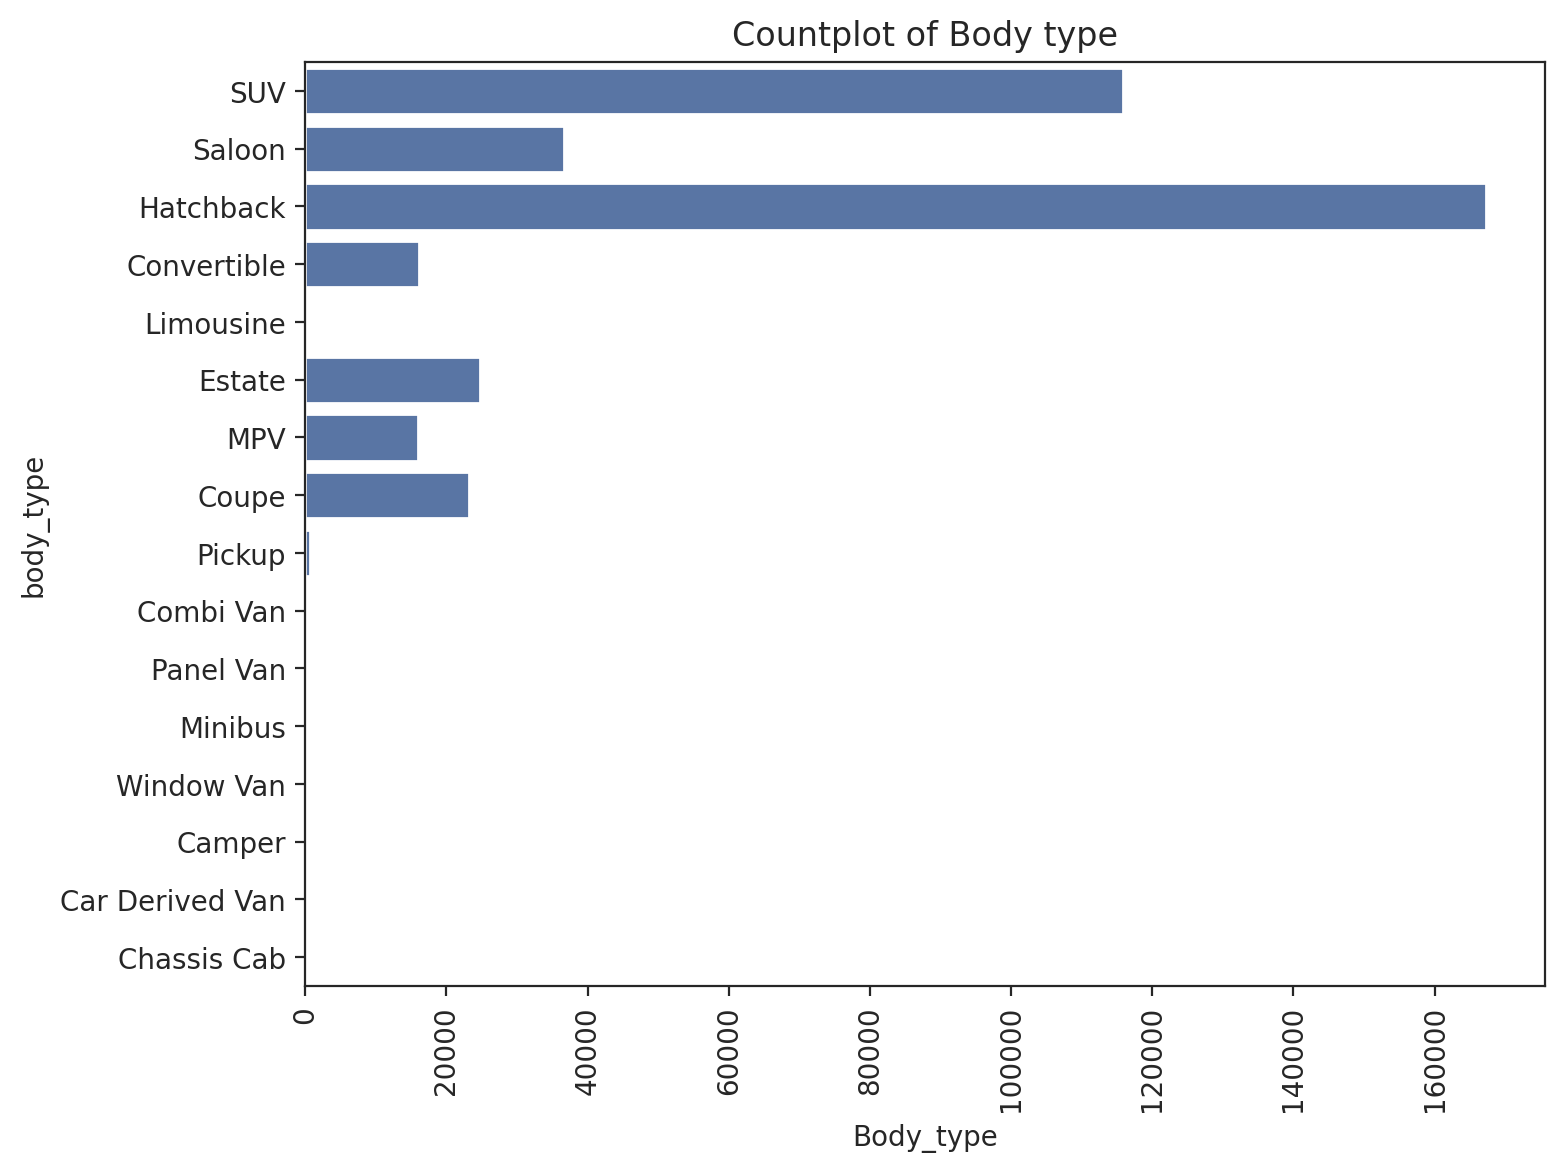

In [ ]:
sns.countplot(categorical_df['body_type'])
plt.xlabel('Body_type')
plt.title('Countplot of Body type')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Inspecting the body type proportion
body_type_prop = categorical_df['body_type'].value_counts()/categorical_df['body_type'].count()
body_type_prop

body_type
Hatchback          0.417070
SUV                0.288837
Saloon             0.091336
Estate             0.061550
Coupe              0.057976
Convertible        0.039978
MPV                0.039948
Pickup             0.001545
Combi Van          0.000533
Limousine          0.000396
Minibus            0.000371
Camper             0.000192
Panel Van          0.000152
Window Van         0.000102
Chassis Cab        0.000007
Car Derived Van    0.000005
Name: count, dtype: float64

In [ ]:
#41.70% of all the cars are of body type Hatchback. followed by the SUV with 28.88%

In [ ]:
categorical_df['fuel_type'].value_counts()

fuel_type
Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: count, dtype: int64

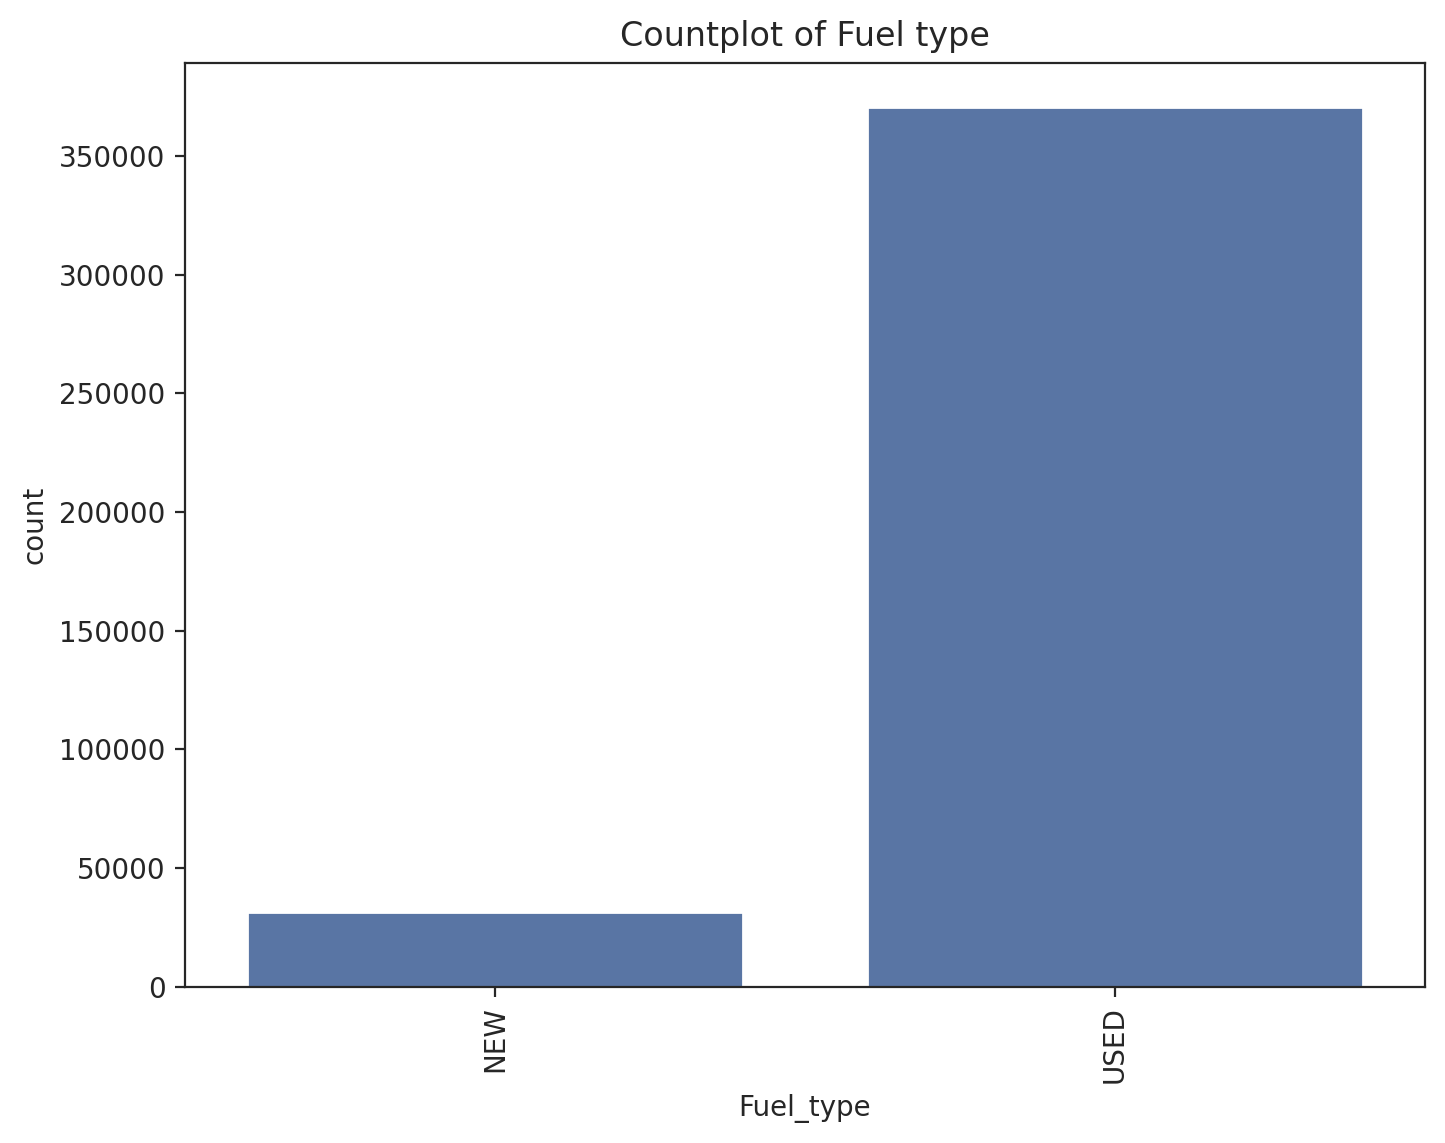

In [ ]:
sns.countplot(data = car_adverts, x = 'vehicle_condition')
plt.xlabel('vehicle_condition')
plt.title('Countplot of vehicle_condition')
plt.xlabel('Fuel_type')
plt.title('Countplot of Fuel type')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
car_adverts.describe(include = "all")

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
count,4.020050e+05,401878.000000,370148,396627,402005,402005,402005,368694.000000,4.020050e+05,401168,402005,401404
unique,NaN,NaN,72,22,110,1168,2,NaN,NaN,16,2,9
top,NaN,NaN,17,Black,BMW,Golf,USED,NaN,NaN,Hatchback,False,Petrol
freq,NaN,NaN,36738,86287,37376,11583,370756,NaN,NaN,167315,400210,216929
mean,2.020071e+14,37743.595656,NaN,NaN,NaN,NaN,NaN,2015.006206,1.734197e+04,NaN,NaN,NaN
std,1.691662e+10,34831.724018,NaN,NaN,NaN,NaN,NaN,7.962667,4.643746e+04,NaN,NaN,NaN
min,2.013072e+14,0.000000,NaN,NaN,NaN,NaN,NaN,999.000000,1.200000e+02,NaN,NaN,NaN
25%,2.020090e+14,10481.000000,NaN,NaN,NaN,NaN,NaN,2013.000000,7.495000e+03,NaN,NaN,NaN
50%,2.020093e+14,28629.500000,NaN,NaN,NaN,NaN,NaN,2016.000000,1.260000e+04,NaN,NaN,NaN
75%,2.020102e+14,56875.750000,NaN,NaN,NaN,NaN,NaN,2018.000000,2.000000e+04,NaN,NaN,NaN


# Identifying missing values

In [ ]:
#checking for the missing values in each of the features
car_adverts.isnull().sum().sort_values(ascending=False)

year_of_registration     33311
reg_code                 31857
standard_colour           5378
body_type                  837
fuel_type                  601
mileage                    127
public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
dtype: int64

In [ ]:
#there are 33311 missing values in the year of registration column
car_adverts.year_of_registration.isnull().sum()

33311

UK's car registration codes for age and year identifiers tables from the wikipedia page UK Vehicle Registration Codes shows there is a relationship between reg_code and year_of_registration.

In [ ]:
car_adverts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
#checking where reg code is null and where year of registration is null
car_adverts[car_adverts['reg_code'].isnull() & (car_adverts['year_of_registration'].isnull())]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401860,202010024501227,10.0,NaN,Silver,Mitsubishi,Shogun Sport,NEW,NaN,31999,SUV,False,Diesel
401890,202010104843364,5.0,NaN,Red,BMW,Z4,NEW,NaN,47910,Convertible,False,Petrol
401902,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401905,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol


In [ ]:
missing_yor = car_adverts[car_adverts['year_of_registration'].isnull()]
missing_yor

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401860,202010024501227,10.0,NaN,Silver,Mitsubishi,Shogun Sport,NEW,NaN,31999,SUV,False,Diesel
401890,202010104843364,5.0,NaN,Red,BMW,Z4,NEW,NaN,47910,Convertible,False,Petrol
401902,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401905,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol


In [ ]:
#let us confirm if only NEW cars are without year of registration
missing_yor['vehicle_condition'].value_counts()

vehicle_condition
NEW     31249
USED     2062
Name: count, dtype: int64

In [ ]:
#We will be filling the year_of_reg and reg_code for new cars with current year based on assumption
missing_yor.loc[missing_yor['vehicle_condition']=="NEW", "year_of_registration"] = 2024
missing_yor.loc[missing_yor['vehicle_condition']=="NEW", "reg_code"] = 24

In [ ]:
missing_yor.isnull().sum()

public_reference            0
mileage                    19
reg_code                  321
standard_colour          1132
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     2062
price                       0
body_type                 349
crossover_car_and_van       0
fuel_type                 297
dtype: int64

In [ ]:
#let us apply missing_yor to the main dataframe
car_adverts.loc[car_adverts['vehicle_condition']=="NEW", "year_of_registration"] = 2024
car_adverts.loc[car_adverts['vehicle_condition']=="NEW", "reg_code"] = 24

In [ ]:
car_adverts.isnull().sum().sort_values(ascending=False)

standard_colour          5378
year_of_registration     2062
body_type                 837
reg_code                  608
fuel_type                 601
mileage                   127
public_reference            0
standard_make               0
standard_model              0
vehicle_condition           0
price                       0
crossover_car_and_van       0
dtype: int64

In [ ]:
#Now let us compare reg_code and year_of_registration and see if we can create a mapping
car_adverts[car_adverts['reg_code'].isnull() & (car_adverts['year_of_registration'].isnull())]


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1510,202010054642656,13406.0,NaN,White,Land Rover,Range Rover Evoque,USED,NaN,26000,Coupe,False,Diesel
2631,202010235350805,1000.0,NaN,Blue,Maserati,Levante,USED,NaN,63995,SUV,False,Petrol
4766,202003238706011,NaN,NaN,Grey,Subaru,Outback,USED,NaN,35995,Estate,False,Petrol
6998,202010225284269,160.0,NaN,Grey,McLaren,Senna,USED,NaN,699950,Coupe,False,Petrol
7517,202009234093511,11413.0,NaN,NaN,MINI,Convertible,USED,NaN,14400,Convertible,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
392499,202010064681927,83555.0,NaN,Black,Land Rover,Range Rover Sport,USED,NaN,30995,SUV,False,Diesel
392730,202009093528195,38796.0,NaN,Grey,Rover,110,USED,NaN,3150,Saloon,False,Petrol
396985,202001256559400,29000.0,NaN,Black,Lamborghini,Gallardo,USED,NaN,77990,Coupe,False,Petrol
399728,202008262969804,12812.0,NaN,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,False,Petrol


In [ ]:
#we still have some used cars with no registration details. This is clearly a case of ommission. we can choose to drop them or inspect further.
#we will be dropping them.
car_adverts.dropna(subset=['year_of_registration', 'reg_code'], how='all', inplace=True)

In [ ]:
car_adverts.isnull().sum()

public_reference            0
mileage                   115
reg_code                  287
standard_colour          5352
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     1741
price                       0
body_type                 778
crossover_car_and_van       0
fuel_type                 593
dtype: int64

In [ ]:
#let us check the remaining missing values for year_of_registration
car_adverts[car_adverts['year_of_registration'].isnull()]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
54,202007030806426,30000.0,18,Red,Vauxhall,Insignia,USED,NaN,11990,Hatchback,False,Petrol
83,202008222801747,42847.0,61,Red,Honda,Jazz,USED,NaN,5695,Hatchback,False,Petrol
865,202010084741550,43130.0,66,White,Land Rover,Range Rover Sport,USED,NaN,35990,SUV,False,Diesel
968,202010305607535,63369.0,17,Blue,SKODA,Rapid Spaceback,USED,NaN,7490,Hatchback,False,Diesel
1256,202010225294466,18715.0,68,White,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
400336,202010315635977,66287.0,63,Blue,Vauxhall,Astra GTC,USED,NaN,8400,Coupe,False,Petrol
400725,202008252905656,45.0,20,Silver,Land Rover,Range Rover Evoque,USED,NaN,46945,SUV,False,Diesel
401314,202010315635541,12522.0,67,Red,Dacia,Sandero,USED,NaN,6300,Hatchback,False,Petrol
401323,201909222504136,46000.0,13,Grey,Volkswagen,Caravelle,USED,NaN,22995,MPV,False,Diesel


In [ ]:
#creating a dictionary using the reg_code column and the year_of_registration
#Create a dictionary mapping the values in column 'reg_code'
#to the corresponding values in column 'year_of_registration'
mapping_dict = car_adverts.set_index('reg_code')['year_of_registration'].to_dict()
mapping_dict

{24: 2024.0,
 '61': 2011.0,
 '17': 2017.0,
 '16': 2016.0,
 '64': 2014.0,
 '13': 2013.0,
 '08': 2008.0,
 '19': 2019.0,
 '60': 2011.0,
 '69': 2019.0,
 '66': 2016.0,
 '12': 2012.0,
 '18': 2018.0,
 '65': 2015.0,
 '09': 2009.0,
 'B': 1964.0,
 '10': 2010.0,
 '14': 2014.0,
 '03': 2003.0,
 '67': 2017.0,
 '63': 2014.0,
 '15': 2015.0,
 '68': 2018.0,
 '56': 2006.0,
 '20': 2020.0,
 '70': 2020.0,
 '62': 2012.0,
 '11': 2011.0,
 '05': 2005.0,
 '59': 2009.0,
 '58': 2009.0,
 'W': 2000.0,
 '02': 2002.0,
 '57': 2007.0,
 '06': 2006.0,
 '52': 2002.0,
 '53': 2003.0,
 '04': 2004.0,
 'J': 1992.0,
 '07': 2007.0,
 '55': 2005.0,
 '51': 2002.0,
 nan: 2020.0,
 'X': 2000.0,
 'D': nan,
 'S': 1998.0,
 'Y': 2001.0,
 '54': 2005.0,
 'H': 1991.0,
 'K': 1972.0,
 'E': 1988.0,
 'L': 1973.0,
 'V': 2000.0,
 'M': 2019.0,
 'G': 1968.0,
 'T': 1999.0,
 'N': 1995.0,
 'P': 1997.0,
 'A': 1963.0,
 'F': 1989.0,
 'R': 1998.0,
 'C': 1965.0,
 '94': nan,
 '85': nan,
 'CA': nan,
 'm': 2005.0,
 'FW': 1934.0,
 '723xuu': nan,
 '95': nan,
 's'

In [ ]:
#filling the null values in the year of registration coloumn
car_adverts['year_of_registration'] = car_adverts['year_of_registration'].fillna(car_adverts['reg_code'].map(mapping_dict))

In [ ]:
car_adverts.isnull().sum().sort_values(ascending = False)

standard_colour          5352
body_type                 778
fuel_type                 593
reg_code                  287
mileage                   115
year_of_registration       12
public_reference            0
standard_make               0
standard_model              0
vehicle_condition           0
price                       0
crossover_car_and_van       0
dtype: int64

In [ ]:
car_adverts[car_adverts['year_of_registration'].isnull()]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
9940,202010225293464,32001.0,94,Orange,Renault,Captur,USED,NaN,7400,SUV,False,Petrol
28559,202010215252376,58686.0,85,Black,Hyundai,i30,USED,NaN,6900,NaN,False,Diesel
80899,202010014455127,2000.0,CA,Green,Caterham,Seven,USED,NaN,21995,Convertible,False,Petrol
166035,202010195172029,4050.0,723xuu,Turquoise,Chevrolet,Corvette,USED,NaN,89990,NaN,False,Petrol
167430,202010225293472,55643.0,95,Grey,Citroen,DS4,USED,NaN,6800,Hatchback,False,Diesel
231213,202010225293467,61370.0,94,Black,Vauxhall,Mokka,USED,NaN,7450,NaN,False,Diesel
265390,201912315687909,23157.0,38,Black,Mercedes-Benz,E Class,USED,NaN,26550,NaN,False,Diesel
288265,201908080939232,36500.0,D,NaN,Aston Martin,DB6,USED,NaN,365000,Saloon,False,Petrol
329449,202010225293425,39312.0,95,Silver,Renault,Captur,USED,NaN,8000,SUV,False,Petrol
339049,202010175118726,70986.0,D,Red,Jaguar,Mark II,USED,NaN,23990,Saloon,False,Petrol


In [ ]:
#we can see from the reg_code that these are future dates and this is seen as human error. Therefore we will drop them.
#Drop rows with missing values in the 'year_of_registration' column
car_adverts.dropna(subset=['year_of_registration'], inplace=True)

In [ ]:
#now that we have filled the year_of_registration with reg_code, we can drop the reg_code as it is no more needed.
car_adverts.drop(columns=['reg_code'], inplace=True)

In [ ]:
car_adverts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401672 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401672 non-null  int64  
 1   mileage                401557 non-null  float64
 2   standard_colour        396321 non-null  object 
 3   standard_make          401672 non-null  object 
 4   standard_model         401672 non-null  object 
 5   vehicle_condition      401672 non-null  object 
 6   year_of_registration   401672 non-null  float64
 7   price                  401672 non-null  int64  
 8   body_type              400899 non-null  object 
 9   crossover_car_and_van  401672 non-null  bool   
 10  fuel_type              401079 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 34.1+ MB


In [ ]:
car_adverts.isnull().sum().sort_values(ascending = False)

standard_colour          5351
body_type                 773
fuel_type                 593
mileage                   115
public_reference            0
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
crossover_car_and_van       0
dtype: int64

In [ ]:
# Filling the missing values in fuel_type with the mode
car_adverts['fuel_type'] = car_adverts['fuel_type'].fillna(car_adverts['fuel_type'].mode()[0])


# Filling the missing values in body_type with the mode
car_adverts['body_type'] = car_adverts['body_type'].fillna(car_adverts['body_type'].mode()[0])


# Filling the missing values in standard_colour with the mode
car_adverts['standard_colour'] = car_adverts['standard_colour'].fillna(car_adverts['standard_colour'].mode()[0])

In [ ]:
# Filling the missing values in mileage with the mean
car_adverts['mileage'].fillna(car_adverts['mileage'].mean(), inplace=True)

In [ ]:
#All missing values have been attended to
car_adverts.isnull().sum().sort_values(ascending = False)

public_reference         0
mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
car_adverts.describe()

,public_reference,mileage,year_of_registration,price
count,4.016720e+05,401672.000000,401672.000000,4.016720e+05
mean,2.020071e+14,37745.183065,2015.710184,1.716376e+04
std,1.684198e+10,34829.593361,8.008705,2.535864e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10484.750000,2014.000000,7.495000e+03
50%,2.020093e+14,28642.000000,2017.000000,1.260000e+04
75%,2.020102e+14,56866.250000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2024.000000,3.799995e+06


In [ ]:
#checking for errors in the year_of_registration
car_adverts[car_adverts['year_of_registration'] < 1900]

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59010,202006270588110,14000.0,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid
69516,202010155035879,96659.0,Black,Audi,A4 Avant,USED,1515.0,10385,Estate,False,Diesel
84501,202009163810376,37771.0,Black,Smart,fortwo,USED,1063.0,4785,Coupe,False,Petrol
114737,202008102305925,30000.0,Red,Toyota,AYGO,USED,1009.0,4695,Hatchback,False,Petrol
120858,202010064654489,27200.0,Black,MINI,Clubman,USED,1016.0,18990,Estate,False,Diesel
190556,202010205206488,58470.0,Black,Fiat,Punto Evo,USED,1010.0,3785,Hatchback,False,Petrol
199830,202009013167637,23000.0,Silver,MINI,Hatch,USED,1009.0,5995,Hatchback,False,Petrol
199987,202010225311657,104000.0,Silver,BMW,1 Series,USED,1008.0,4395,Convertible,False,Petrol
201616,202010134937656,8600.0,Silver,BMW,M2,USED,1018.0,41990,Coupe,False,Petrol
201626,202010155037484,69346.0,Red,Mazda,Mazda3,USED,999.0,8795,Saloon,False,Petrol


we have invalid years in the year of registration i.e <1900 so we will drop them

In [ ]:
#dropping the values with year of registration
car_adverts = car_adverts[car_adverts['year_of_registration'] >= 1900]


Dealing with Outliers

In [ ]:
#lets remove outliers
numerical_cols = car_adverts.select_dtypes(include=[np.number]).columns
Q1 = car_adverts[numerical_cols].quantile(0.25) # first quartile
Q3 = car_adverts[numerical_cols].quantile(0.75) # third quartile
IQR = Q3 - Q1 # interquartile range

In [ ]:
outliers = (car_adverts[numerical_cols] < (Q1 - 1.5 * IQR) | (car_adverts[numerical_cols] > (Q3 + 1.5 * IQR)))

In [ ]:
car_adverts = car_adverts[~ outliers.any(axis = 1)]

In [ ]:
car_adverts.shape

(385450, 11)

In [ ]:
#let us convert year_of_registration to integer
car_adverts['year_of_registration'] = car_adverts['year_of_registration'].astype(int)

In [ ]:
car_adverts.dtypes

public_reference           int64
mileage                  float64
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration       int64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [ ]:
car_adverts_new = car_adverts.drop(['public_reference', 'standard_colour'], axis=1)

In [ ]:
#let us create a new column for the numerical features and compare with the price feature.
numeric_cols = ['price', 'mileage', 'year_of_registration', 'crossover_car_and_van']
car_adv_num = car_adverts_new[numeric_cols]

corr_matrix = car_adv_num.corr()
corr_matrix

,price,mileage,year_of_registration,crossover_car_and_van
price,1.000000,-0.275440,0.214715,0.018884
mileage,-0.275440,1.000000,-0.702610,0.033633
year_of_registration,0.214715,-0.702610,1.000000,-0.022225
crossover_car_and_van,0.018884,0.033633,-0.022225,1.000000


sns.heatmap(car_adv_num.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
import datetime

#let us create a new age column
current_year = datetime.datetime.now().year

# Create a new column 'age'
car_adverts = car_adverts.assign(age=current_year - car_adverts['year_of_registration'])

In [ ]:
#let us also create a new categorical variable 'odometer_reading' from mileage.
car_adverts['odometer_reading'] = pd.cut(car_adverts['mileage'],
                      bins=[0.0,20000.0,80000.0,125000.0],
                      labels=['LOW','AVERAGE','HIGH'],
                      right=False,
                      include_lowest=True
                     )

**Feature Selection**

In [ ]:
# Stratify sample
car_df = car_adverts_new.groupby(['standard_make', 'standard_model']).sample(frac=0.30, random_state=0)

# Split the data into features (X) and target (y)
X = car_df.drop(columns=['price'])
y = car_df['price']

In [ ]:
car_df.head()

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
170662,18174.0,Abarth,124 Spider,USED,2018,19250,Convertible,False,Petrol
207747,5740.0,Abarth,124 Spider,USED,2018,19500,Convertible,False,Petrol
397047,10336.0,Abarth,124 Spider,USED,2018,18995,Convertible,False,Petrol
183842,9100.0,Abarth,124 Spider,USED,2018,19990,Convertible,False,Petrol
75406,11726.0,Abarth,124 Spider,USED,2018,18595,Convertible,False,Petrol


In [ ]:
# Define the column transformer to handle different types of features
numeric_features = ['mileage', 'year_of_registration']
categorical_features = ['standard_make', 'standard_model', 'vehicle_condition',
                        'body_type', 'crossover_car_and_van', 'fuel_type']

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from category_encoders.target_encoder import TargetEncoder

categorical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('targetencoder', TargetEncoder())
])


from category_encoders import TargetEncoder

# Define the pipeline for categorical transformation
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('targetencoder', TargetEncoder())])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough',
    verbose_feature_names_out=False)

In [ ]:
# Fixing the random seed for reproducibility
np.random.seed(42)

# Split the data into training, and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Now we have:
# X_train, y_train: Training set
# X_val, y_val: Validation set
# X_test, y_test: Testing set

In [ ]:
# Apply preprocessing to the training, validation, and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

Polynomial Features

In [ ]:
# Create a PolynomialFeatures transformer
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the training data
X_train_poly = polynomial_transformer.fit_transform(X_train_preprocessed)

# Transform the validation and testing data
X_val_poly = polynomial_transformer.transform(X_val_preprocessed)
X_test_poly = polynomial_transformer.transform(X_test_preprocessed)

In [ ]:
X_train_poly.columns

Index(['mileage', 'year_of_registration', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type',
       'mileage^2', 'mileage year_of_registration', 'mileage standard_make',
       'mileage standard_model', 'mileage vehicle_condition',
       'mileage body_type', 'mileage crossover_car_and_van',
       'mileage fuel_type', 'year_of_registration^2',
       'year_of_registration standard_make',
       'year_of_registration standard_model',
       'year_of_registration vehicle_condition',
       'year_of_registration body_type',
       'year_of_registration crossover_car_and_van',
       'year_of_registration fuel_type', 'standard_make^2',
       'standard_make standard_model', 'standard_make vehicle_condition',
       'standard_make body_type', 'standard_make crossover_car_and_van',
       'standard_make fuel_type', 'standard_model^2',
       'standard_model vehicle_condition', 'standard_model body_type',
       'standard_model c

In [ ]:
print('X train', len(X_train), 'y_train', len(y_train))
print('X test', len(X_test), 'y test', len(y_test))
print('X validation', len(X_val), 'y validation', len(y_val))

X train 69375 y_train 69375
X test 23125 y test 23125
X validation 23125 y validation 23125


In [ ]:
X_train_poly.head()

,mileage,year_of_registration,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type,mileage^2,mileage year_of_registration,...,vehicle_condition^2,vehicle_condition body_type,vehicle_condition crossover_car_and_van,vehicle_condition fuel_type,body_type^2,body_type crossover_car_and_van,body_type fuel_type,crossover_car_and_van^2,crossover_car_and_van fuel_type,fuel_type^2
13345,-0.464128,0.120217,8015.698793,6680.147662,15897.173707,10336.814501,16565.325334,15991.645435,0.215415,-0.055796,...,2.527201e+08,1.643261e+08,2.633419e+08,2.542220e+08,1.068497e+08,1.712327e+08,1.653027e+08,2.744100e+08,2.649068e+08,2.557327e+08
326791,0.226507,-0.753680,20285.004503,14051.638436,15897.173707,27324.082582,16565.325334,15991.645435,0.051305,-0.170714,...,2.527201e+08,4.343757e+08,2.633419e+08,2.542220e+08,7.466055e+08,4.526323e+08,4.369570e+08,2.744100e+08,2.649068e+08,2.557327e+08
330250,1.636553,-1.846050,11027.810415,9935.020221,15897.173707,10336.814501,16565.325334,15991.645435,2.678305,-3.021158,...,2.527201e+08,1.643261e+08,2.633419e+08,2.542220e+08,1.068497e+08,1.712327e+08,1.653027e+08,2.744100e+08,2.649068e+08,2.557327e+08
46194,-1.091455,0.994113,12303.781440,23565.244090,15897.173707,21182.401791,16565.325334,15991.645435,1.191273,-1.085029,...,2.527201e+08,3.367403e+08,2.633419e+08,2.542220e+08,4.486941e+08,3.508934e+08,3.387415e+08,2.744100e+08,2.649068e+08,2.557327e+08
98375,0.028237,0.120217,20891.268013,11413.488818,15897.173707,10336.814501,16565.325334,15991.645435,0.000797,0.003395,...,2.527201e+08,1.643261e+08,2.633419e+08,2.542220e+08,1.068497e+08,1.712327e+08,1.653027e+08,2.744100e+08,2.649068e+08,2.557327e+08


# **Model** **Building**


Linear Regression without Feature selection

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
linear_model.score(X_train_poly, y_train), linear_model.score(X_val_poly, y_val)

(0.8071986988841517, 0.7093154355207506)

**Linear** **Regression** **with** **Recursive Feature Elimination** **(RFE)**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, RFECV

rf_sel = Pipeline(
    steps=[
        ('featsel', RFECV(LinearRegression(), step=1, cv=5) ),
        ("lin", LinearRegression())
    ]
)

In [ ]:
rfe = rf_sel['featsel']

In [ ]:
rfe.fit(X_train_poly, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
X_train_rfe = rfe.transform(X_train_poly)
X_val_rfe = rfe.transform(X_val_poly)
X_test_rfe = rfe.transform(X_test_poly)

In [ ]:
rfe.score(X_train_poly, y_train), rfe.score(X_val_poly, y_val)

(0.8069792926289834, 0.7105715140946633)

**Random** **Forest** **Regression with Feature Importance**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfr_sel = Pipeline(
    steps=[
        ('featsel', RFECV(LinearRegression(), step=1, cv=5)),
        ("rf", RandomForestRegressor())
    ]
)

rfr_sel.fit(X_train_poly, y_train)


Pipeline(steps=[('featsel', RFECV(cv=5, estimator=LinearRegression())),
                ('rf', RandomForestRegressor())])

In [ ]:
rfr_sel.score(X_train_poly, y_train), rfr_sel.score(X_val_poly, y_val)

(0.9810404793283328, 0.8517288693382619)

**Gradient** **Boosting** **Regression**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

gbr_sel = Pipeline(
    steps=[
        ('featsel', RFECV(LinearRegression(), step=1, cv=5)),
        ("gb", GradientBoostingRegressor())
    ]
)

gbr_sel.fit(X_train_poly, y_train)

Pipeline(steps=[('featsel', RFECV(cv=5, estimator=LinearRegression())),
                ('gb', GradientBoostingRegressor())])

In [ ]:
gbr_sel.score(X_train_poly, y_train), gbr_sel.score(X_val_poly, y_val)

(0.9441848793293803, 0.8173160836430662)

**Voting** **Regression** **Model**

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize base regression models
linear_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Create voting ensemble regression model using selected features
voting_model = VotingRegressor(
    estimators=[
        ('linear', LinearRegression()),
        ('rf', RandomForestRegressor()),
        ('gb', GradientBoostingRegressor())
    ]
)

In [ ]:
# Fit the final pipeline to your data
voting_model.fit(X_train_rfe, y_train)

VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor())])

In [ ]:
voting_model.score(X_train_rfe, y_train), voting_model.score(X_val_rfe, y_val)

(0.9455244783119012, 0.8367092329006752)

# •	Model Evaluation and Analysis



**Overall Performance with Cross-Validation**

In [ ]:
lr = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor(max_depth=3)

models = [lr, rfr, gbr]

In [ ]:
results_list = []
for my_model in models:
    eval_results = cross_validate(
        my_model, X_train_rfe, y_train, cv=5,
        scoring='neg_mean_absolute_error',
        return_train_score=True
    )
    results_list.append(
        (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
         -eval_results['train_score'].mean(), eval_results['train_score'].std())
    )

In [ ]:
results = pd.DataFrame(
    results_list,
    columns=['val_mae_mean', 'val_mae_std', 'train_mae_mean', 'train_mae_std'],
    index=['gbr', 'rfr', 'lr']
)

In [ ]:
results

,val_mae_mean,val_mae_std,train_mae_mean,train_mae_std
gbr,4167.410182,74.519947,4147.048008,39.877337
rfr,2218.221039,86.965961,886.528966,6.418665
lr,3074.032429,56.420184,2913.376900,23.129780


In [ ]:
eval_results = cross_validate(
    voting_model, X_train_rfe, y_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
voting_result = (
    -eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std()
)

voting_result

(2775.4501970575284, 48.286582313485816, 2389.633894806576, 19.877583694389646)

In [ ]:
results.loc['voting_model'] = voting_result

results

,val_mae_mean,val_mae_std,train_mae_mean,train_mae_std
gbr,4167.410182,74.519947,4147.048008,39.877337
rfr,2218.221039,86.965961,886.528966,6.418665
lr,3074.032429,56.420184,2913.376900,23.129780
voting_model,2775.450197,48.286582,2389.633895,19.877584


**True** **vs** **Predicted** **Analysis**

In [ ]:
y_gbr = gbr_sel.predict(X_test_poly)
y_rfr = rfr_sel.predict(X_test_poly)
y_lr = rfe.predict(X_test_poly)
y_vr = voting_model.predict(X_test_rfe)

In [130]:
import matplotlib.pyplot as plt

# Define the true and predicted values for each model
true_predicted_data = [
    (y_test, y_lr, 'Linear Regression'),
    (y_test, y_rfr, 'Random Forest'),
    (y_test, y_gbr, 'Gradient Boosting'),
    (y_test, y_vr, 'Voting Ensemble')
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Iterate through each model's data and plot true vs predicted values
for ax, (true_values, predicted_values, model_name) in zip(axes.flatten(), true_predicted_data):
    ax.scatter(true_values, predicted_values, alpha=0.5)
    ax.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--')
    ax.set_title(f'{model_name} - True vs Predicted')
    ax.set_xlabel('True values')
    ax.set_ylabel('Predicted values')

# Adjust layout
plt.tight_layout()
plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [129]:
# Plot True vs Predicted values for each model
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_rfr, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_gbr, label='Gradient Boosting', alpha=0.5)
plt.scatter(y_test, y_vr, label='Voting Ensemble', alpha=0.5)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Analysis')
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Global** **and** **Local** **Explanations** **with** **SHAP**

In [ ]:
!pip install --upgrade shap==0.44.1 -q
import shap
shap.initjs()

In [ ]:
rfr_model = rfr_sel['rf']
# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rfr_model, data = X_train_poly, feature_names=X_train_poly.columns)

In [ ]:
# Calculate SHAP values with approximate computation
shap_values = explainer.shap_values(X_test_poly, approximate = True)

In [ ]:
shap_values

array([[  428.06272141,     0.        ,   197.93474552, ...,
            0.        ,     0.        ,     0.        ],
       [  -61.61638972,     3.45054768,    82.11164181, ...,
            0.        ,     0.        ,     0.        ],
       [ -214.69178639, -1444.13217865,   -74.86424607, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [  414.51797453,   209.19435574,  -147.50115385, ...,
            0.        ,     0.        ,     0.        ],
       [   -7.65      ,   529.64035757,    31.21376282, ...,
            0.        ,     0.        ,     0.        ],
       [-1739.64887173,    22.25363636,  1064.17047203, ...,
            0.        ,     0.        ,     0.        ]])

Global Explanations

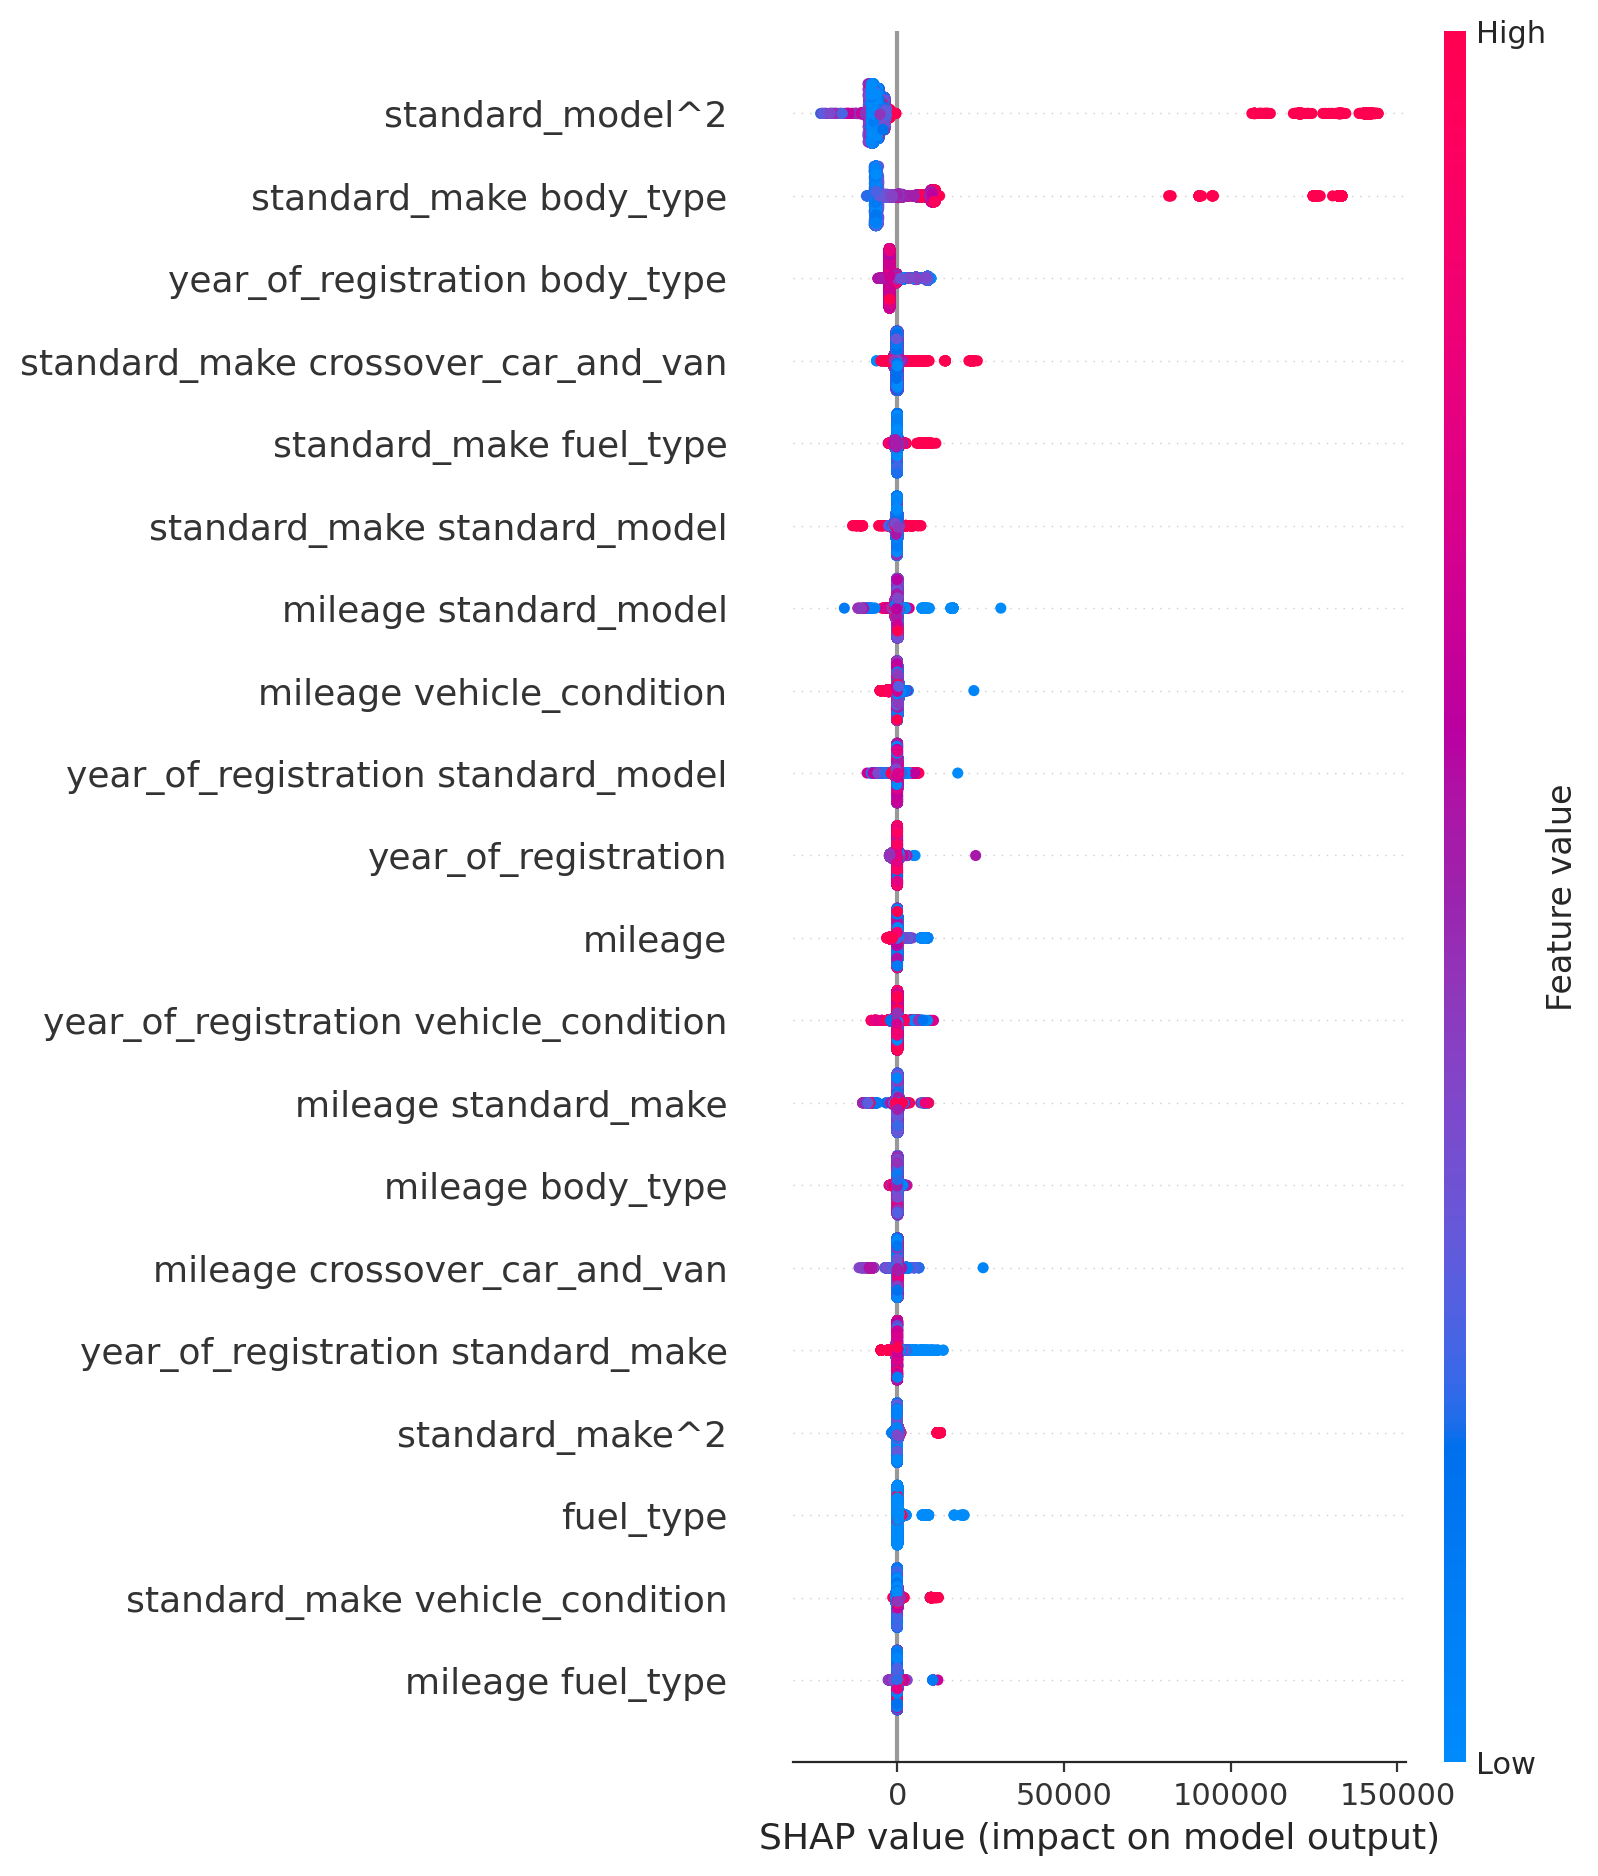

In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test_poly)

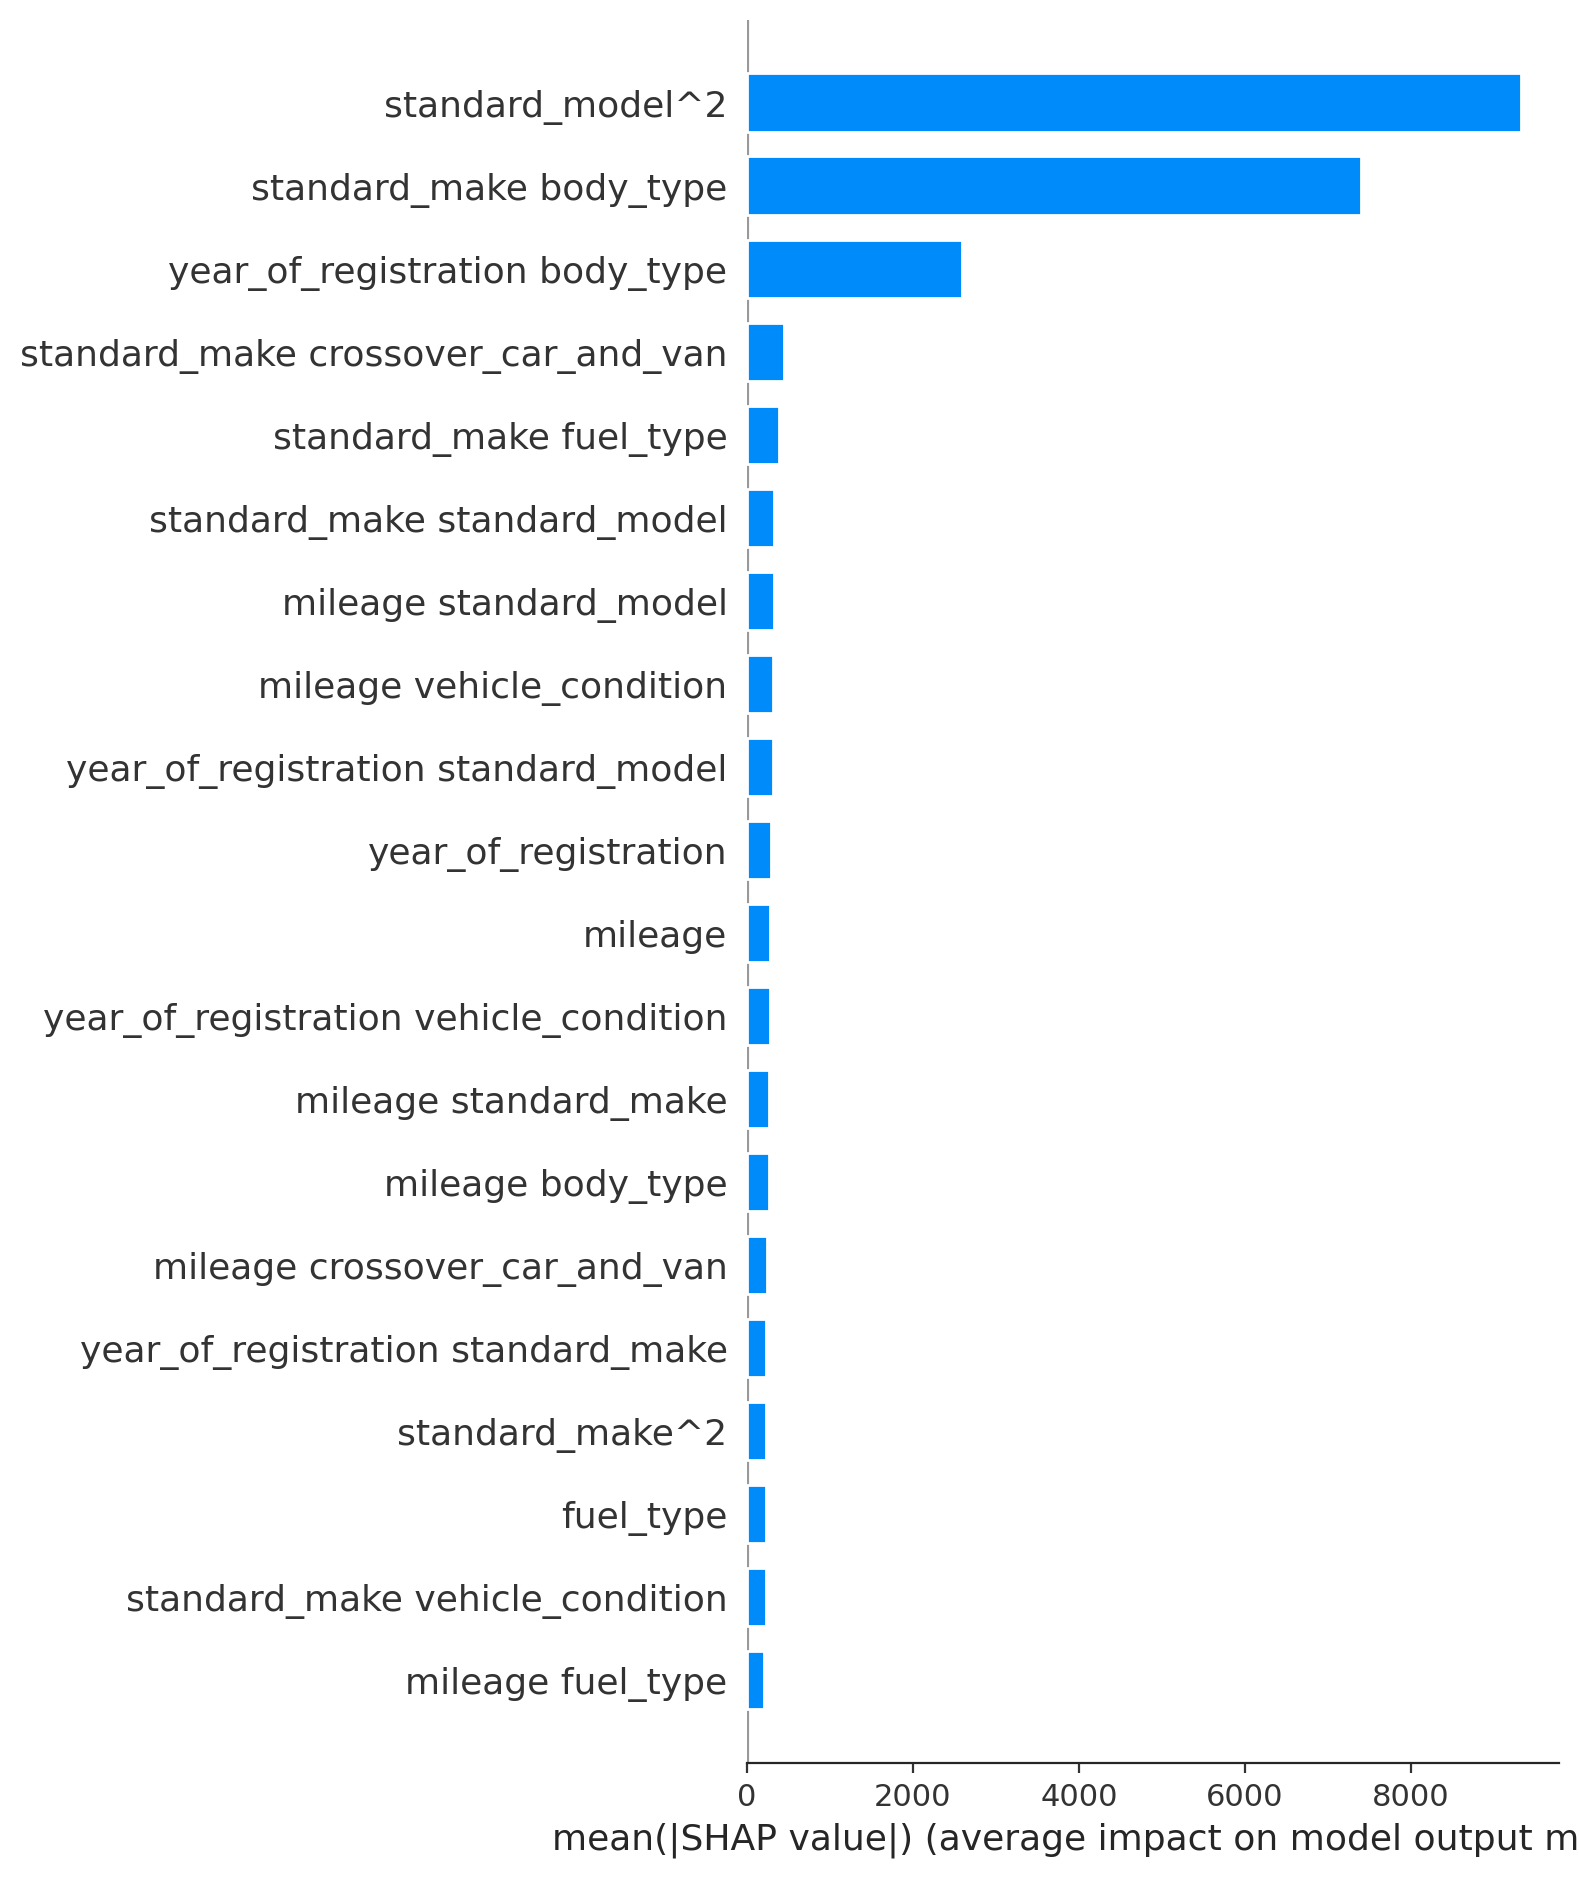

In [ ]:
# Feature Importance Plot
shap.summary_plot(shap_values, X_test_poly, feature_names=X_test_poly.columns, plot_type="bar")


Local Explanations

In [ ]:
shap.initjs()
# Force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test_poly.iloc[0])

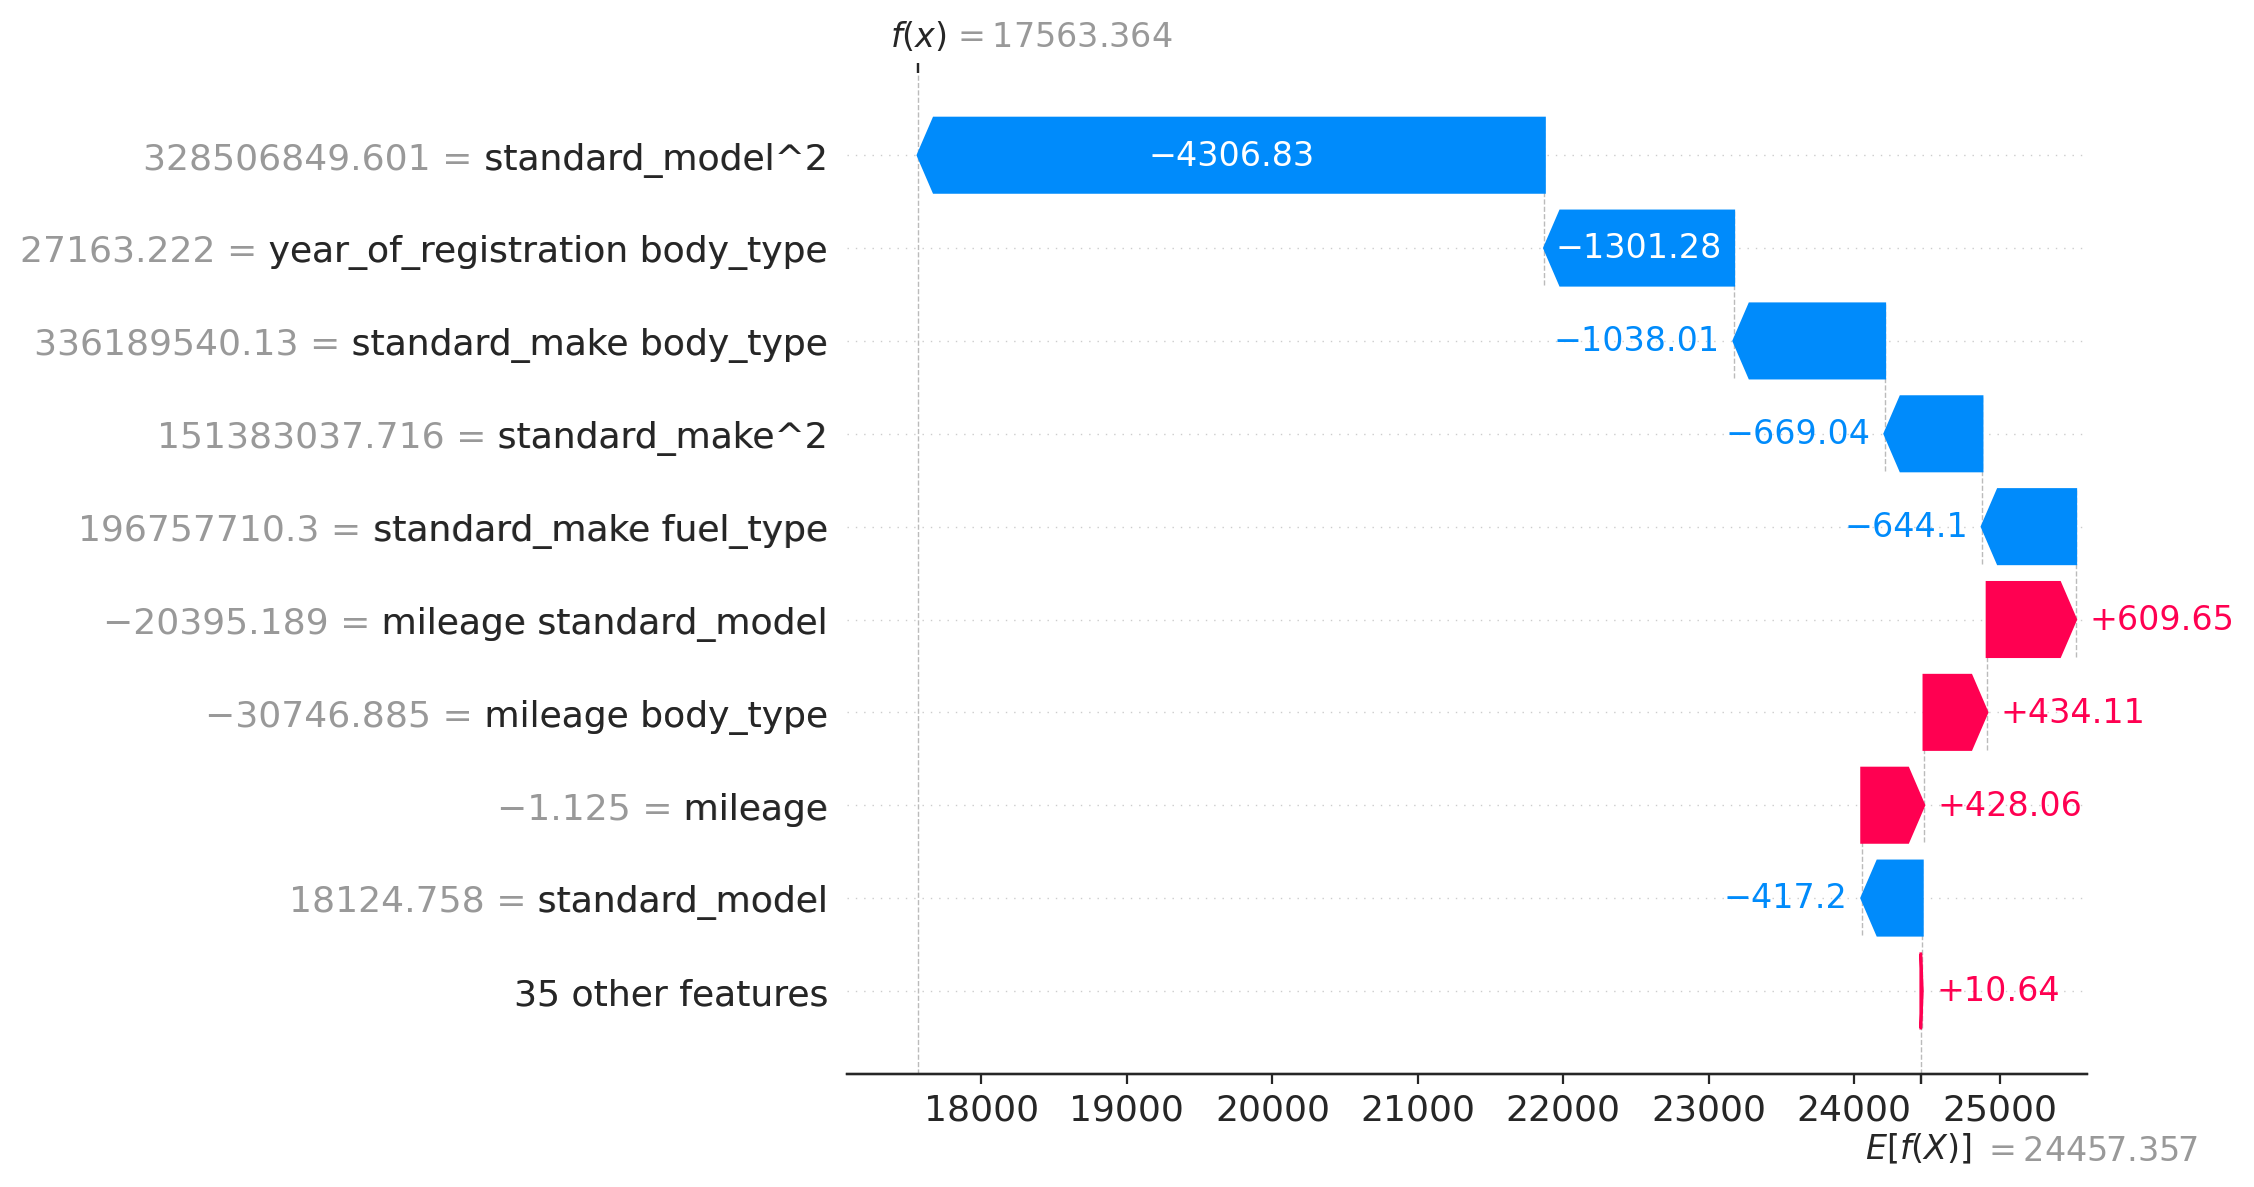

In [ ]:
shap.initjs()  # Required to enable interactive plots in Jupyter Notebook

# Create an Explanation object
explanation = shap.Explanation(values=shap_values[0,:], base_values=explainer.expected_value, data=X_test_poly.iloc[0,:])

# Generate the waterfall plot
shap.plots.waterfall(explanation)


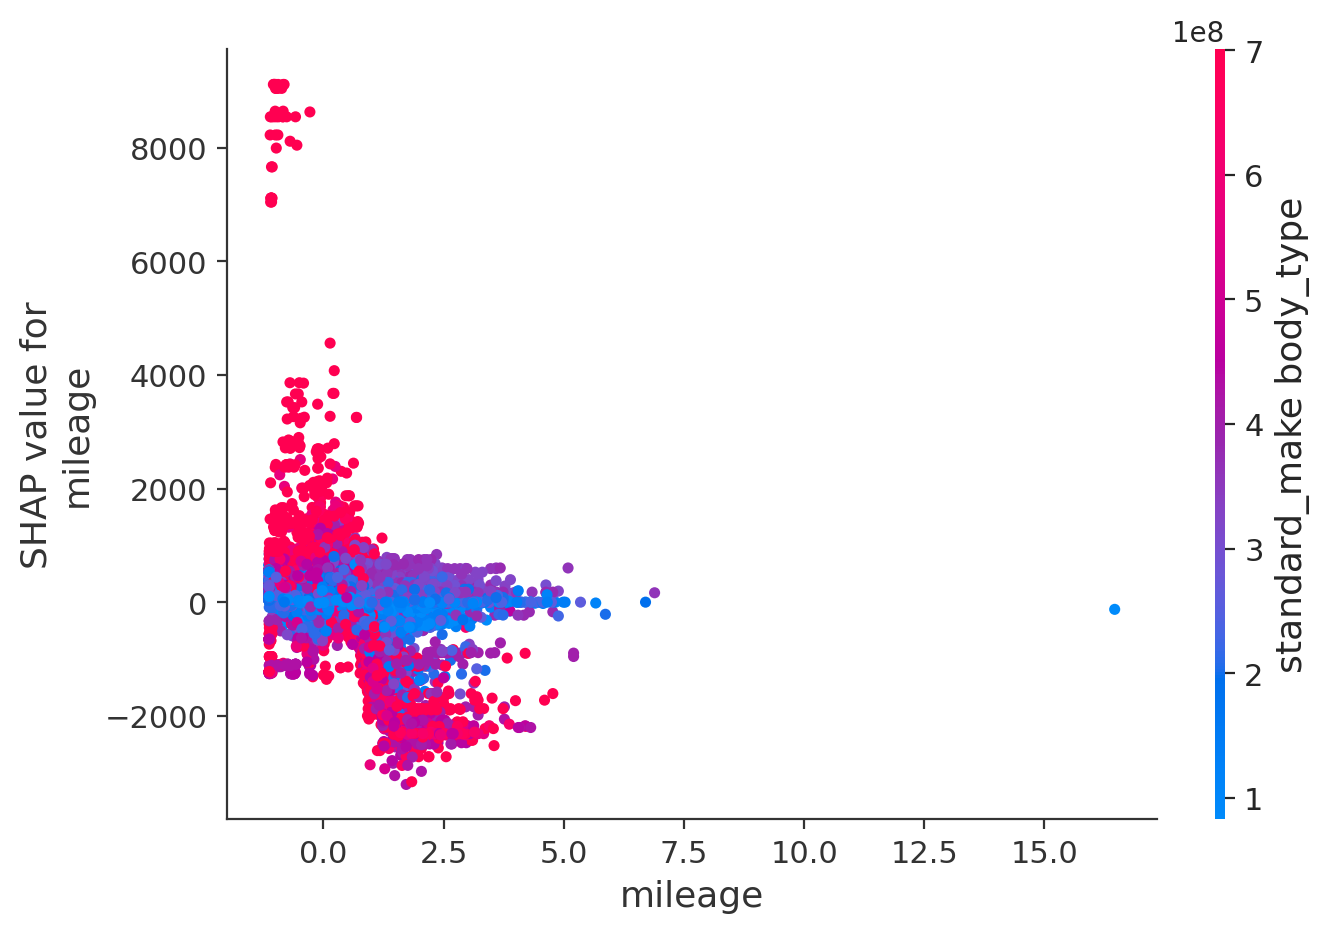

In [ ]:
shap.dependence_plot('mileage', shap_values, X_test_poly)


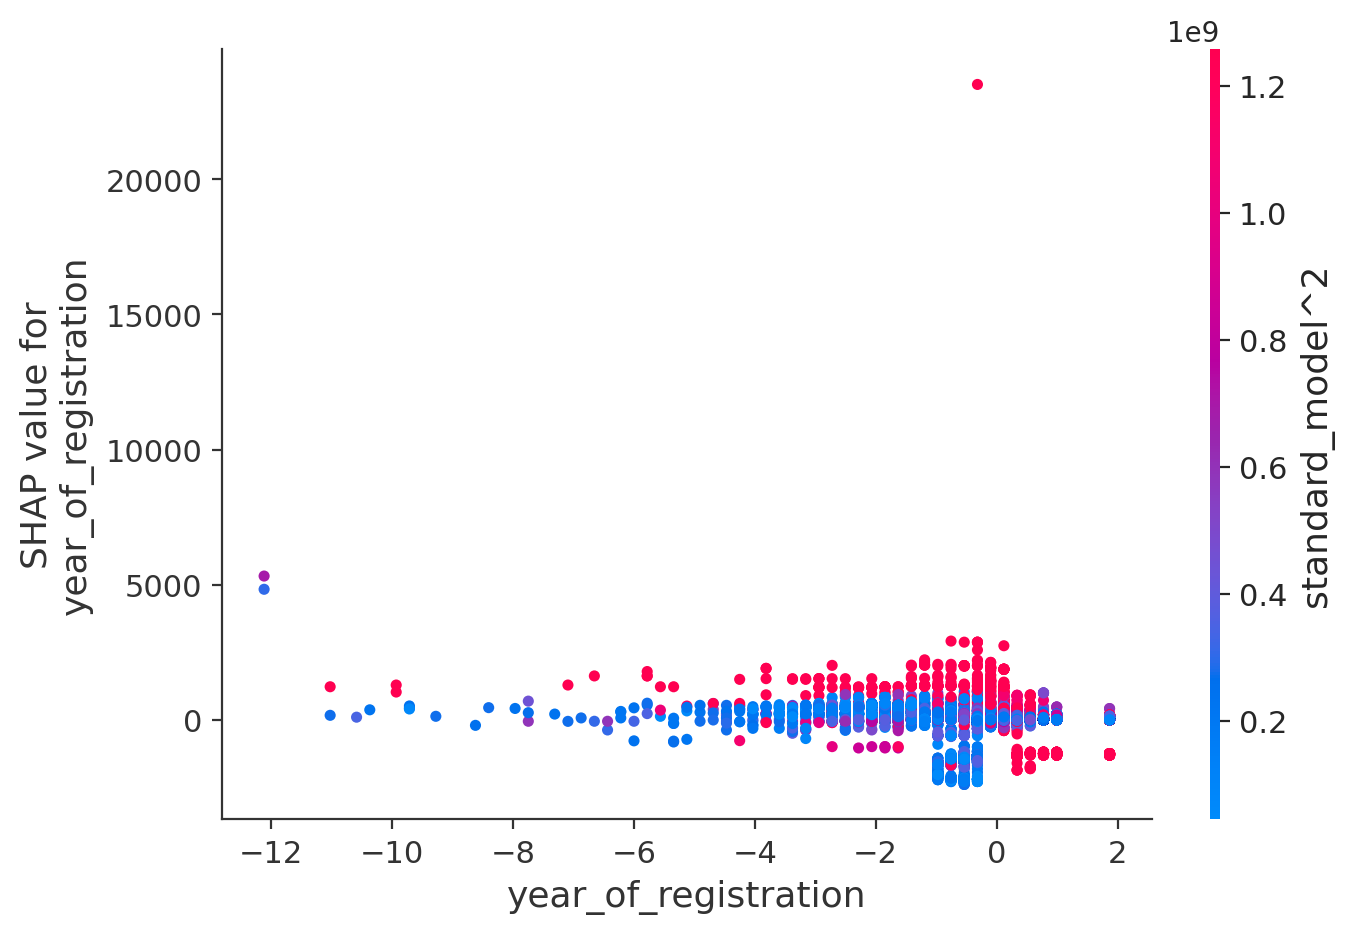

In [ ]:
shap.dependence_plot('year_of_registration', shap_values, X_test_poly)

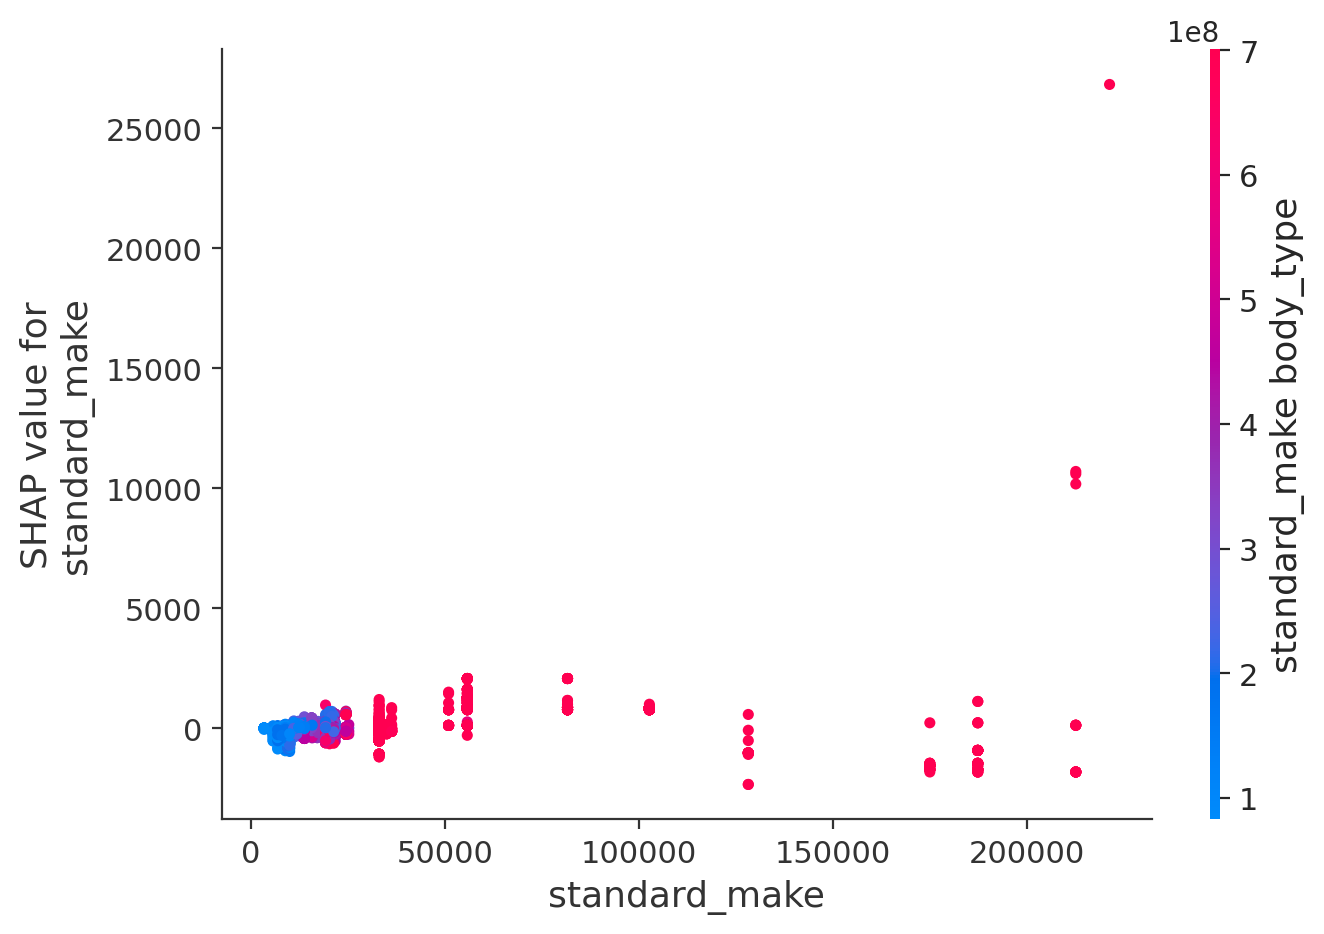

In [ ]:
shap.dependence_plot('standard_make', shap_values, X_test_poly)

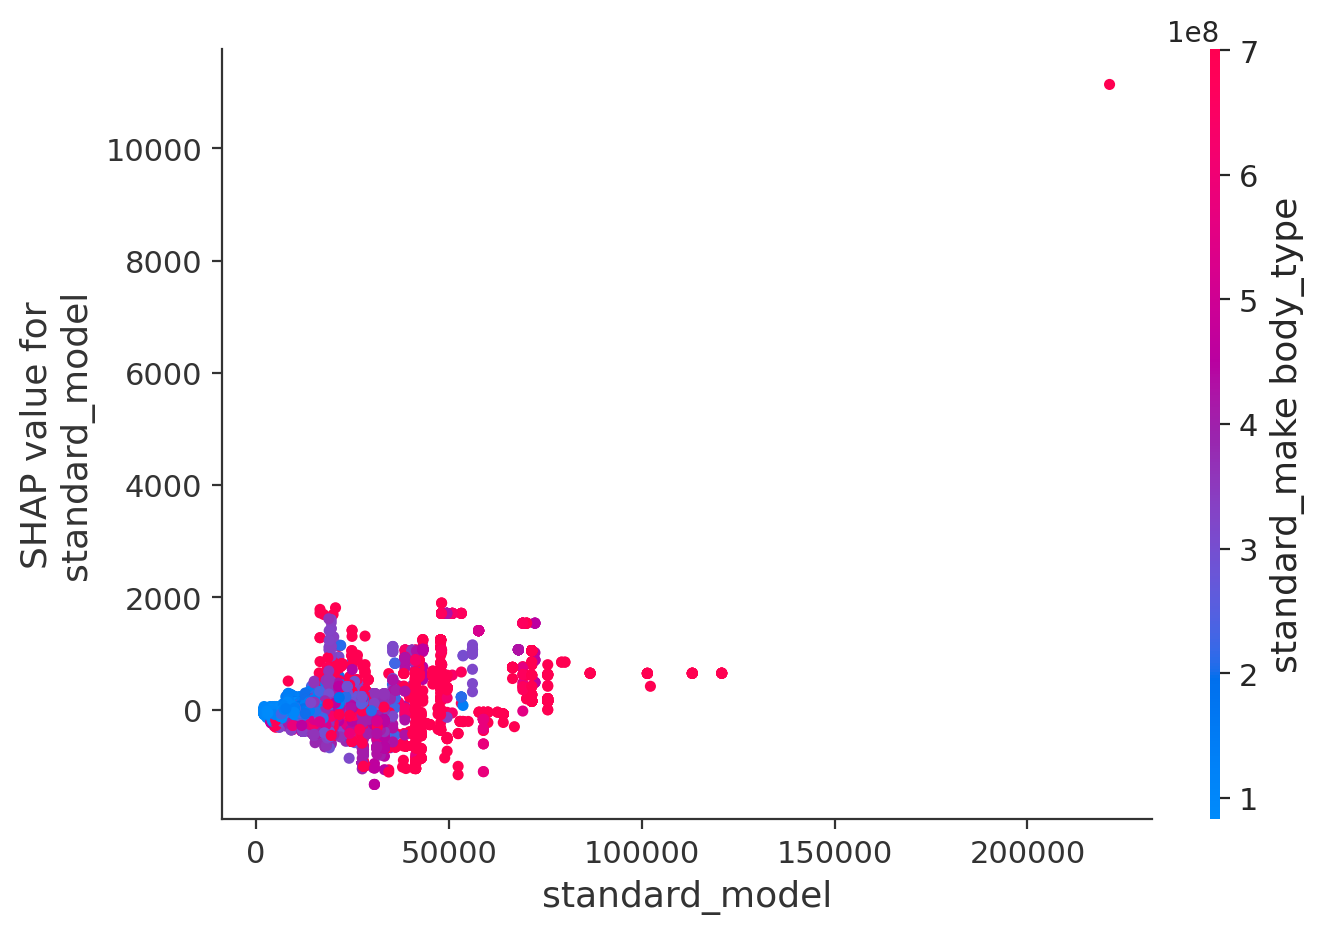

In [ ]:
shap.dependence_plot('standard_model', shap_values, X_test_poly)

**Partial Dependency Plots**

In [ ]:
X_test_poly.columns

Index(['mileage', 'year_of_registration', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type',
       'mileage^2', 'mileage year_of_registration', 'mileage standard_make',
       'mileage standard_model', 'mileage vehicle_condition',
       'mileage body_type', 'mileage crossover_car_and_van',
       'mileage fuel_type', 'year_of_registration^2',
       'year_of_registration standard_make',
       'year_of_registration standard_model',
       'year_of_registration vehicle_condition',
       'year_of_registration body_type',
       'year_of_registration crossover_car_and_van',
       'year_of_registration fuel_type', 'standard_make^2',
       'standard_make standard_model', 'standard_make vehicle_condition',
       'standard_make body_type', 'standard_make crossover_car_and_van',
       'standard_make fuel_type', 'standard_model^2',
       'standard_model vehicle_condition', 'standard_model body_type',
       'standard_model c

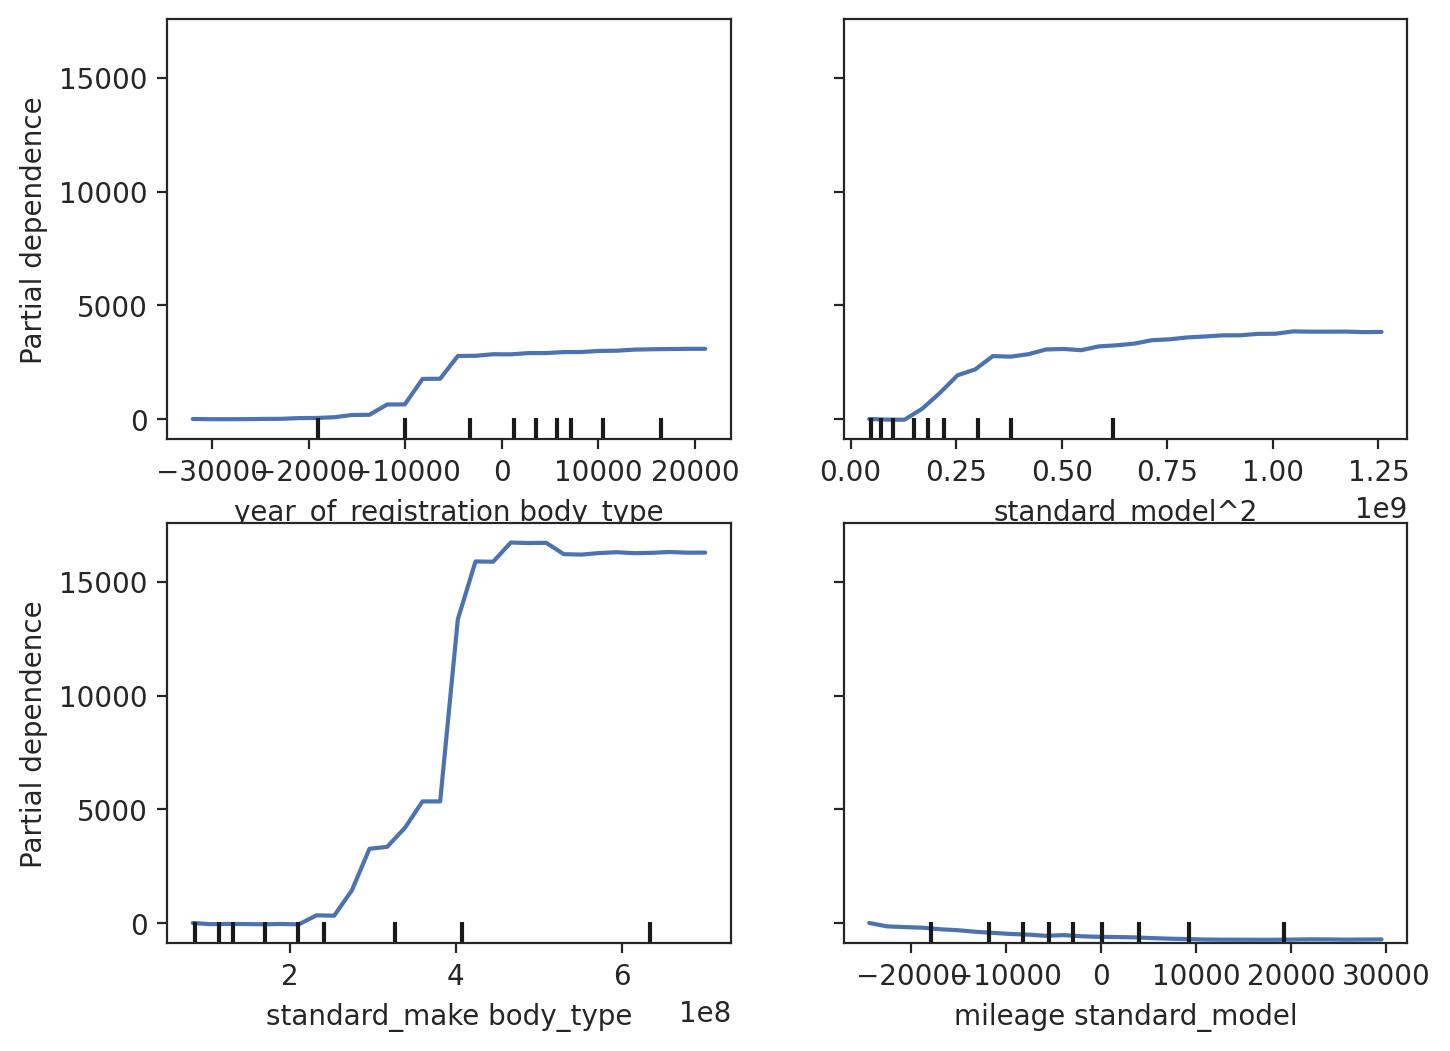

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot partial dependence for selected features
PartialDependenceDisplay.from_estimator(
    rfr_model, X_test_poly, features=['year_of_registration body_type',
                                      'standard_model^2', 'standard_make body_type', 'mileage standard_model'],
    kind='average', centered=True,
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
)

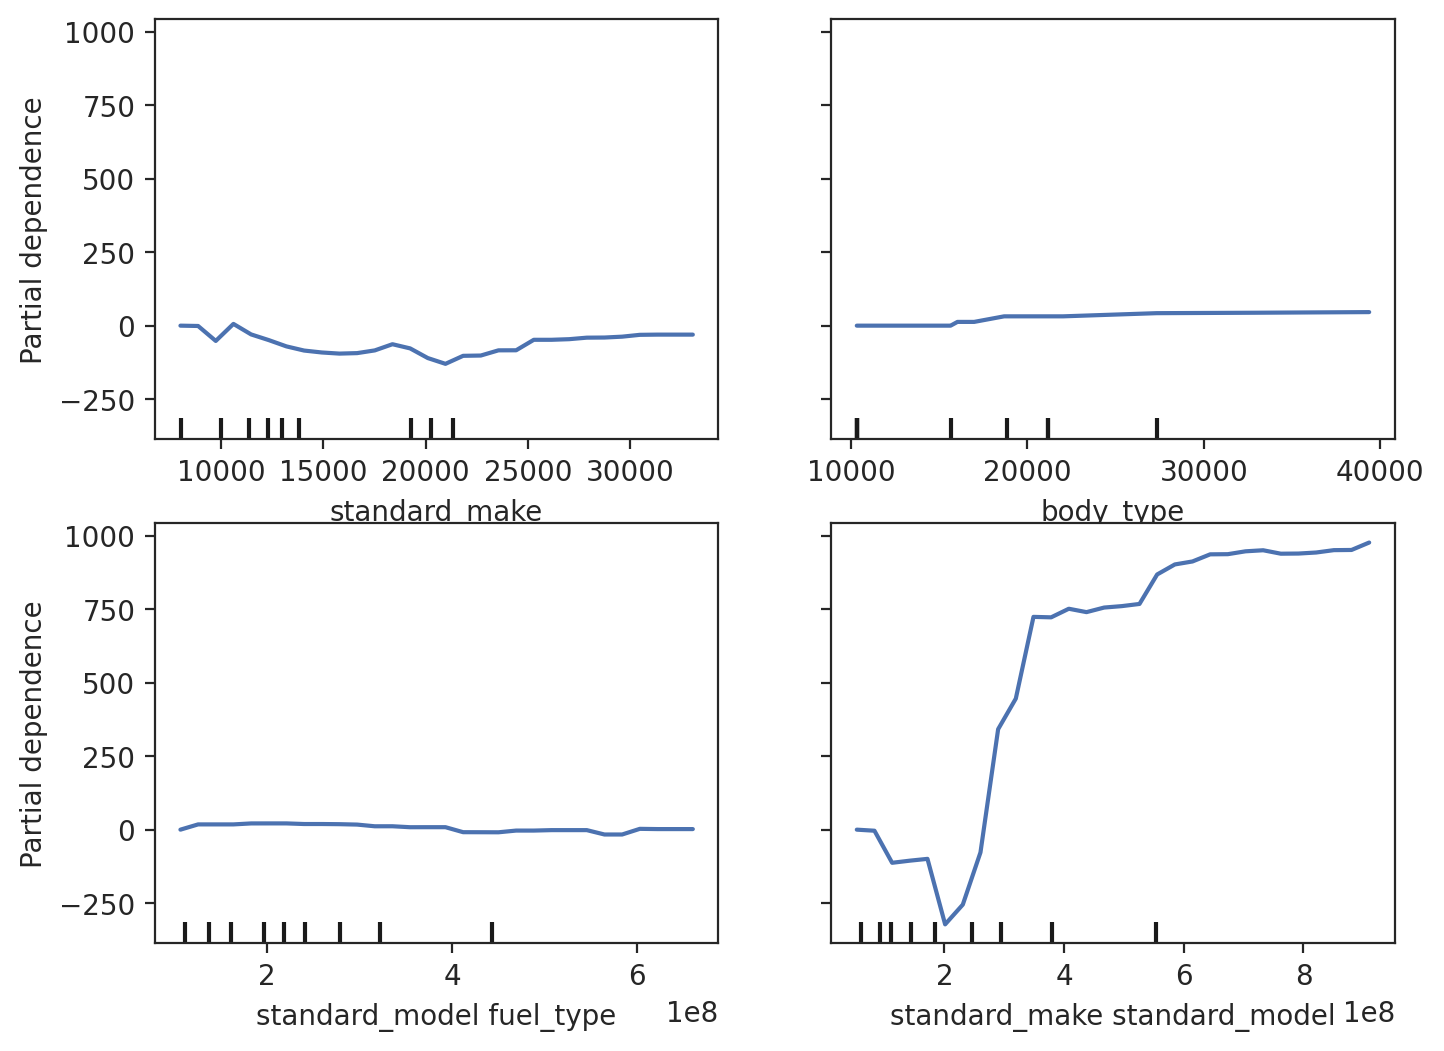

In [ ]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot partial dependence for selected features
PartialDependenceDisplay.from_estimator(
    rfr_model, X_test_poly, features=['standard_make',
                                      'body_type', 'standard_model fuel_type', 'standard_make standard_model'],
    kind='average', centered=True,
    grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
)